<a href="https://colab.research.google.com/github/Hyup98/LSTM_STOCK/blob/main/LSTM_STOCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
# LSTM STOCK-ANALYSIS

my_path = '/content/drive/MyDrive/my_env'
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance


     |████████████████████████████████| 3.1 MB 8.3 MB/s 
     |████████████████████████████████| 109 kB 7.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 19.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#그래프 디자인 선택
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime

In [ ]:
#주식시장 주식이름을 리스트에 저장
tech_list = ['AAPL','GOOG','MSFT','AMZN','NKE', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN, NKE, TSLA]
company_name = ['AAPL','GOOG','MSFT','AMZN','NKE', 'TSLA']

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,1093.989990,19955000,TSLA
2022-03-31,1094.569946,1103.140015,1076.640015,1077.599976,1077.599976,16330900,TSLA
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,1084.589966,18012900,TSLA
2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,1145.449951,27345300,TSLA
2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700,TSLA
2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800,TSLA
2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400,TSLA
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18293300,TSLA
2022-04-11,980.400024,1008.469971,974.640015,975.929993,975.929993,19785700,TSLA


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,151.797205,153.459567,150.324685,151.981457,151.631060,8.666643e+07
std,16.136716,16.486309,15.754269,16.159258,16.344918,2.540384e+07
min,123.160004,124.639999,122.250000,122.769997,122.251930,4.100000e+07
25%,141.794994,143.174995,140.220005,141.932503,141.446243,6.904782e+07
50%,149.285004,150.360001,148.004997,149.290001,148.882751,8.209815e+07
75%,165.667503,169.000000,164.254997,165.657501,165.657501,9.858352e+07
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-04-13 to 2022-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


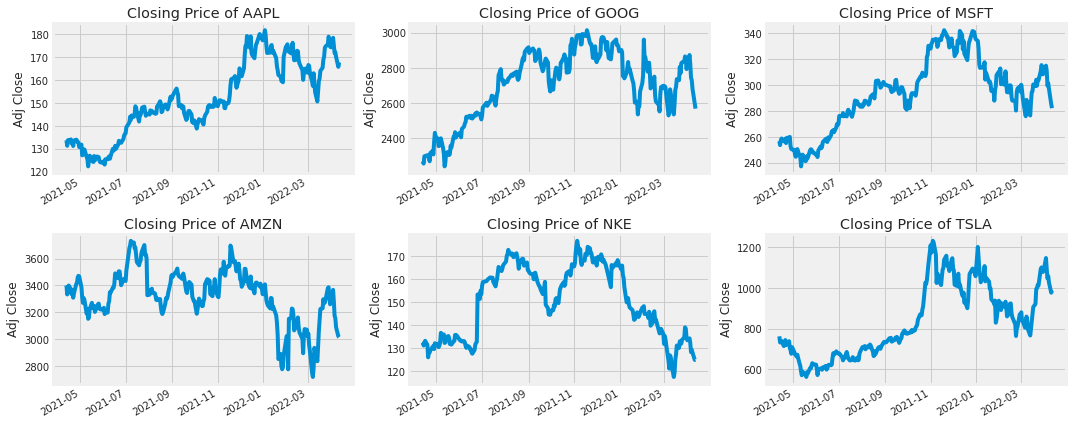

In [ ]:
#그래프 디자인 설정
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

#for문에 사용하는 함수 enumerate()
#인덱스와 원소에 동시에 접근이 가능해진다.
#2번쨰 매개변수는 시작 인덱스를 1로 설정해주는 것-> 첫번쨰 원소를 가르키는 것은 동일

for i, company in enumerate(company_list, 1):
    #그래프 그리기
    plt.subplot(2, 3, i)
    #조정 종가를 그래프로 그리기
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

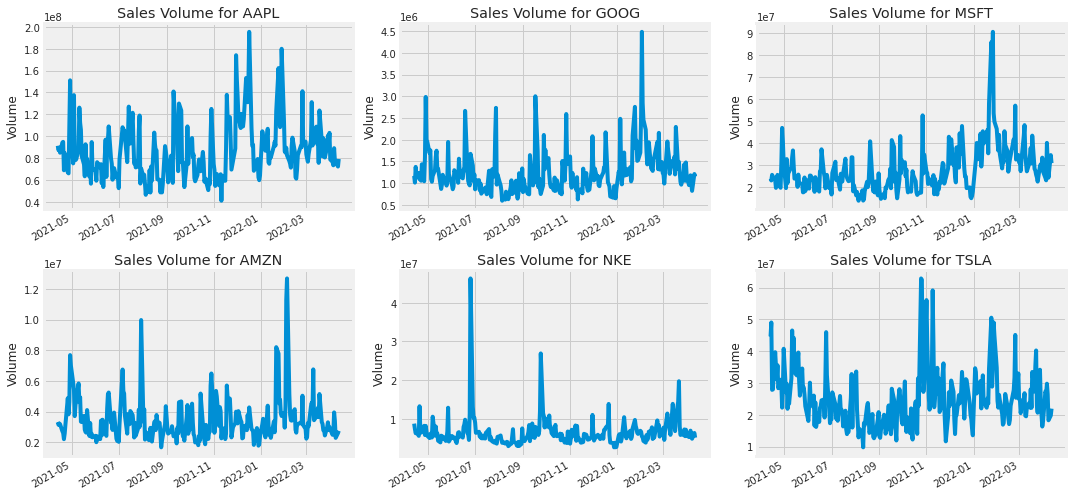

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top = 1.25, bottom = 1.2)
#거래량 그래프
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 3, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()


In [ ]:
#시계열 데이터에서 사용하는 평균 방법 전체가 아닌 일부의 평균을 구할떄 구간 크기
#adj close : 조정 종가
#조정 종가의 이동 평균의 그래프
ma_day = [10, 20 ,50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    #이동평균 평균
    company[column_name] = company['Adj Close'].rolling(ma).mean()

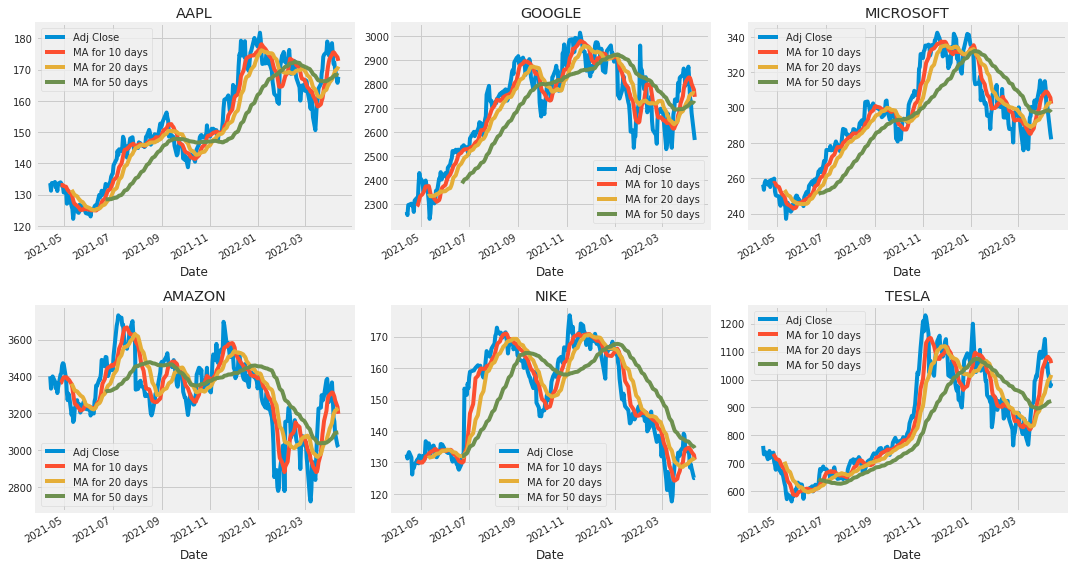

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols= 3)
fig.set_figheight(8)
fig.set_figwidth(15)

#AAPL, GOOG, MSFT, AMZN, NKE, TSLA

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('AAPL')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('AMAZON')

NKE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('NIKE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,2])
axes[1,2].set_title('TESLA')

fig.tight_layout()

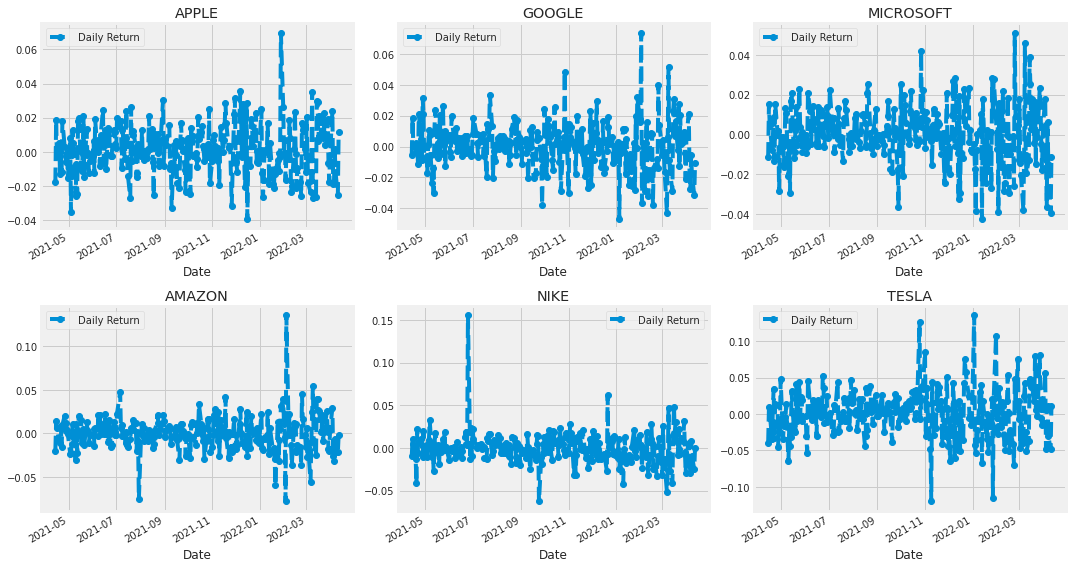

In [ ]:
#조정 종가를 기준으로 수익률을 그래프화
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_figheight(8)
fig.set_figwidth(15)

#AAPL, GOOG, MSFT, AMZN, NKE, TSLA

AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
  

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[0,2], legend = True, linestyle='--', marker='o')
axes[0,2].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle='--', marker='o')
axes[1,0].set_title('AMAZON')

NKE['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle='--', marker='o')
axes[1,1].set_title('NIKE')

TSLA['Daily Return'].plot(ax = axes[1,2], legend = True, linestyle='--', marker='o')
axes[1,2].set_title('TESLA')

fig.tight_layout()

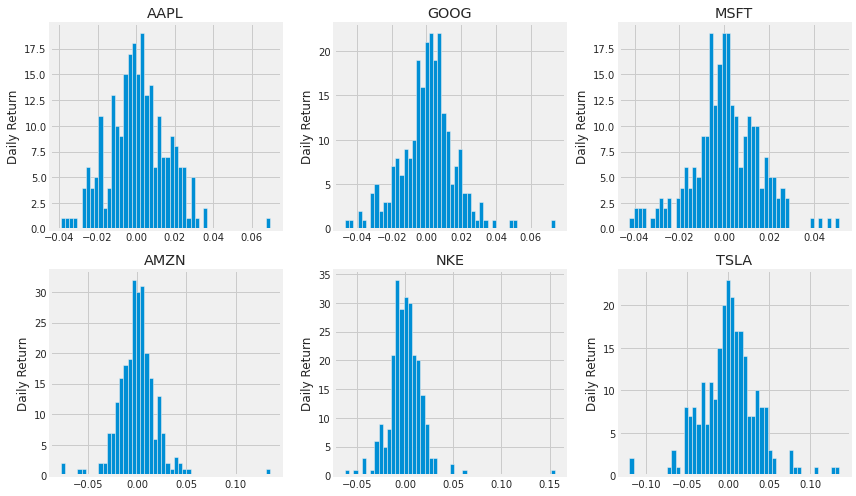

In [ ]:
plt.figure(figsize=(12, 7))

#수익률의 시각화
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 3, i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('Daily Return')
  plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [ ]:
!pip install fix_yahoo_finance
closing_df = DataReader(tech_list,'yahoo', start, end)["Adj Close"]
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NKE,TSLA
Date,,,,,,
2021-04-13,133.635727,2267.270020,256.401489,3400.000000,132.510437,762.320007
2021-04-14,131.249908,2254.840088,253.524918,3333.000000,131.240311,732.229980
2021-04-15,133.705307,2296.659912,257.403320,3379.090088,132.639450,738.849976
2021-04-16,133.367340,2297.760010,258.633331,3399.439941,133.274521,739.780029
2021-04-19,134.043304,2302.399902,256.649506,3372.010010,131.547928,714.630005


In [ ]:
#tech_rets: 수익률
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NKE,TSLA
Date,,,,,,
2021-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-14,-0.017853,-0.005482,-0.011219,-0.019706,-0.009585,-0.039472
2021-04-15,0.018708,0.018547,0.015298,0.013828,0.010661,0.009041
2021-04-16,-0.002528,0.000479,0.004779,0.006022,0.004788,0.001259
2021-04-19,0.005068,0.002019,-0.007670,-0.008069,-0.012955,-0.033997


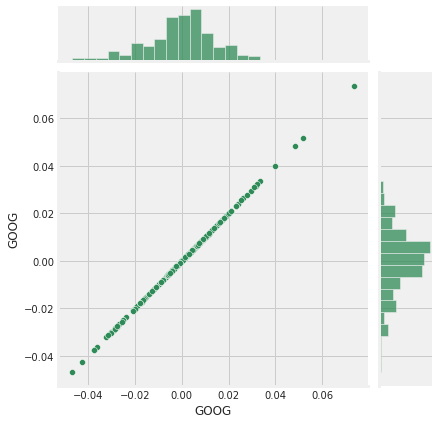

In [ ]:
#수익률 분포 시각화
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

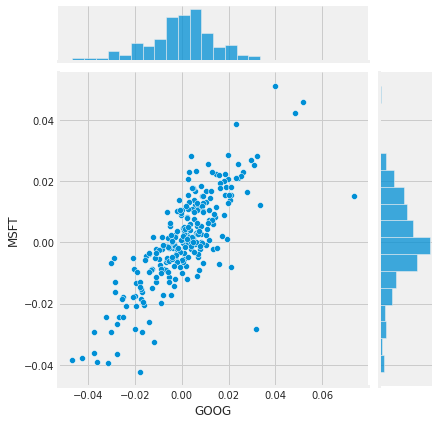

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

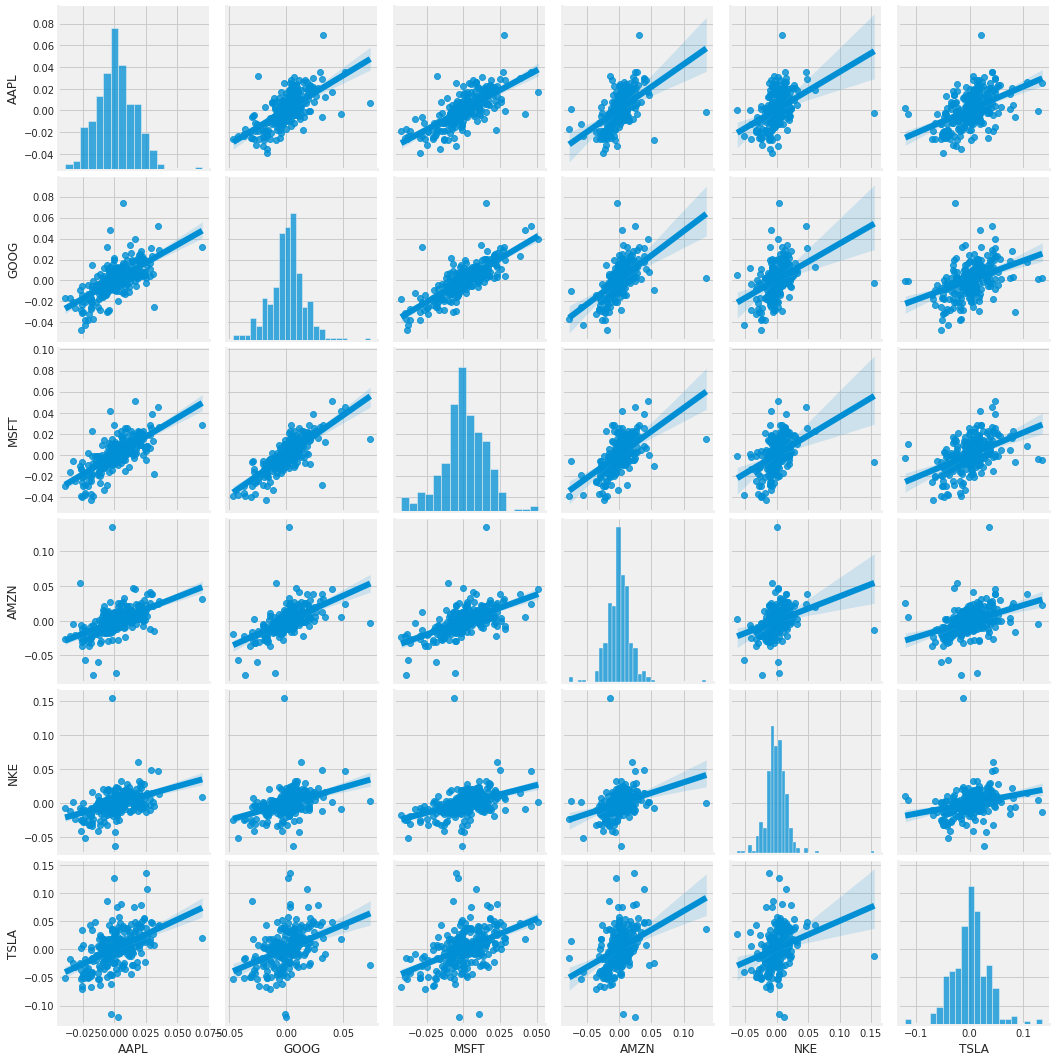

In [ ]:
#회귀선으로 시각화
sns.pairplot(tech_rets, kind='reg')

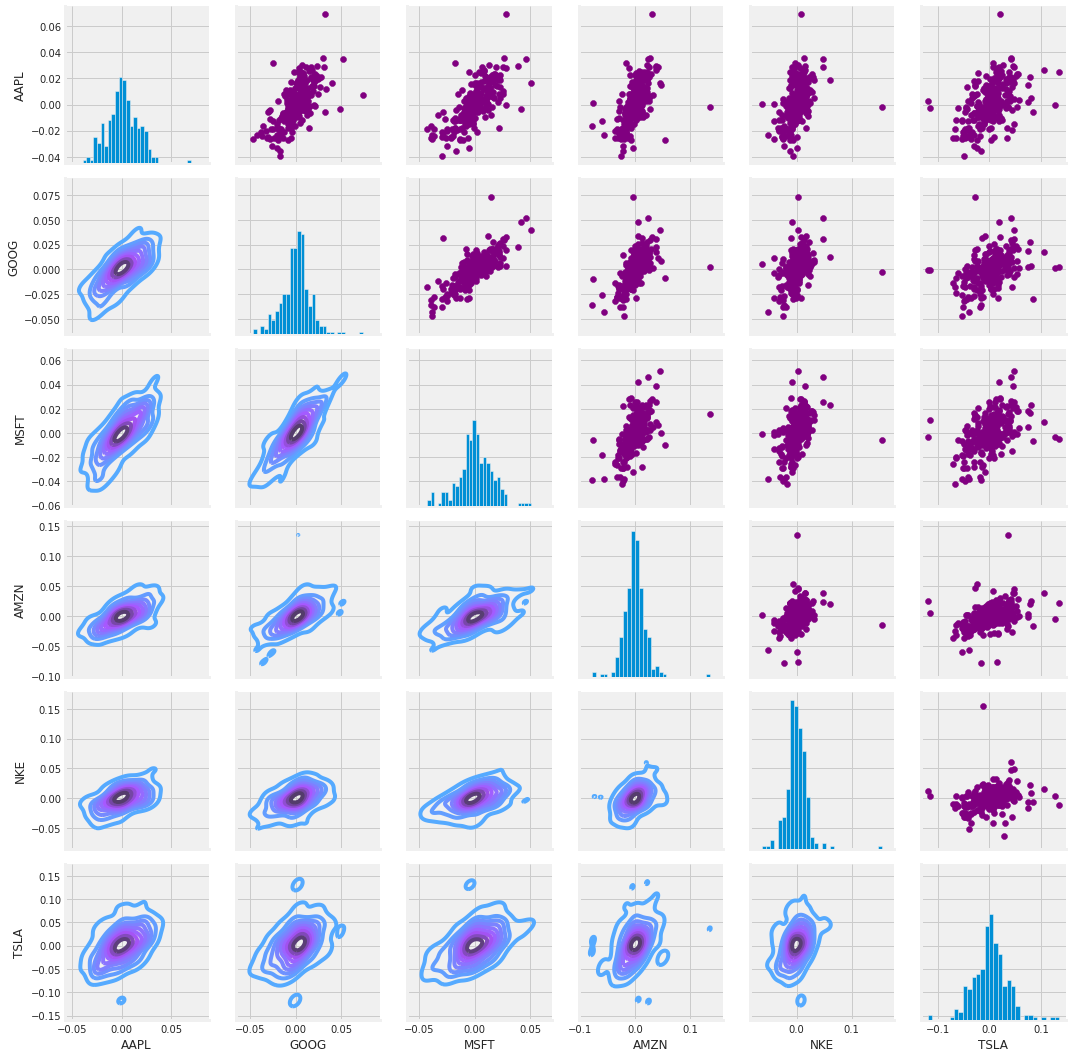

In [ ]:
#결측값 제거
return_fig = sns.PairGrid(tech_rets.dropna())

#보라는 산개도
return_fig.map_upper(plt.scatter, color='purple')

#커널밀도 추정 왼쪽아래 푸른색 그라데이션 그래프
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

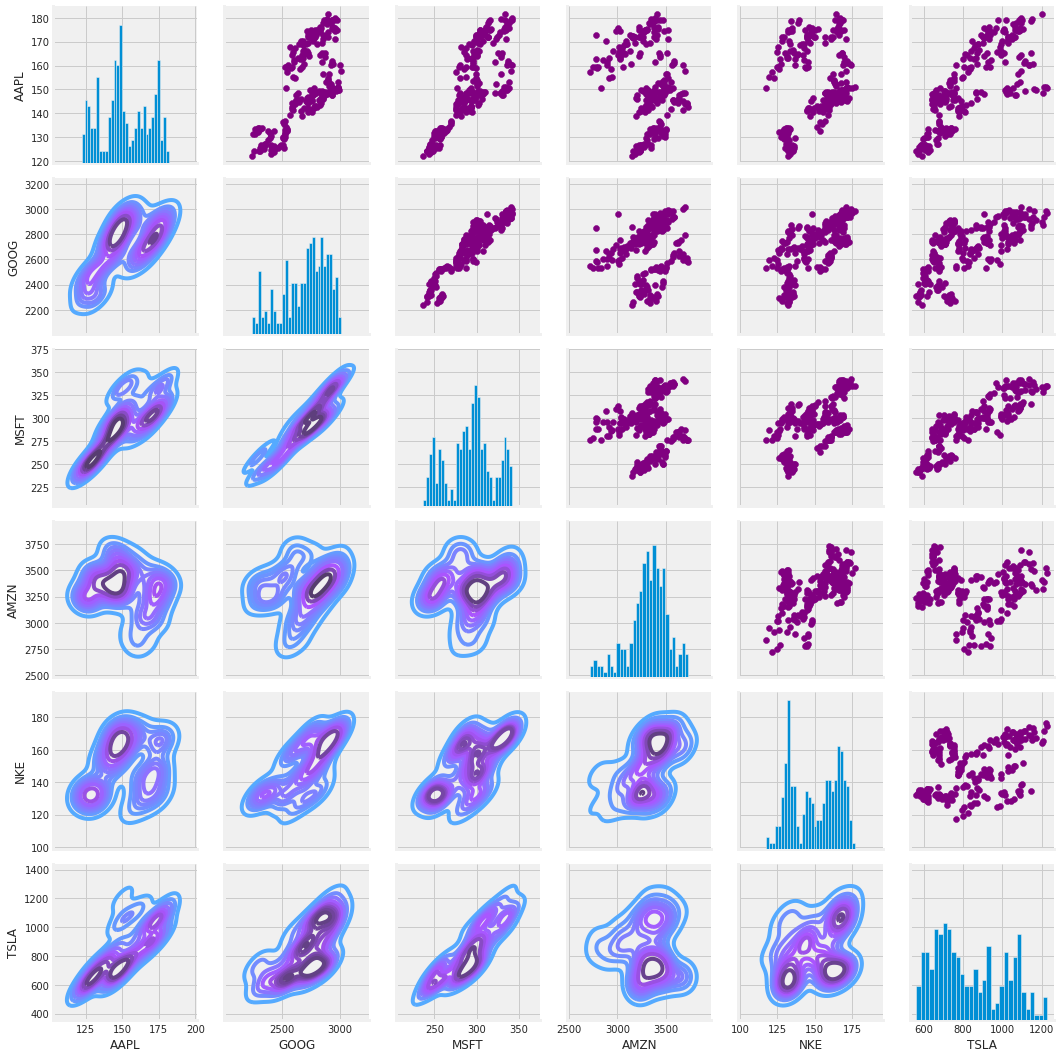

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

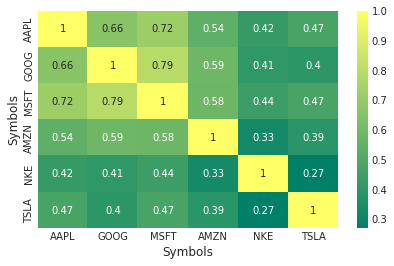

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

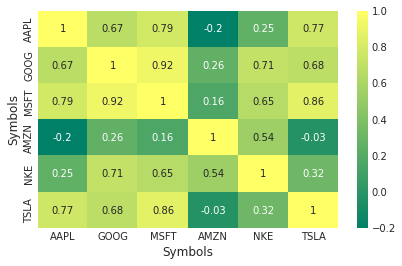

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

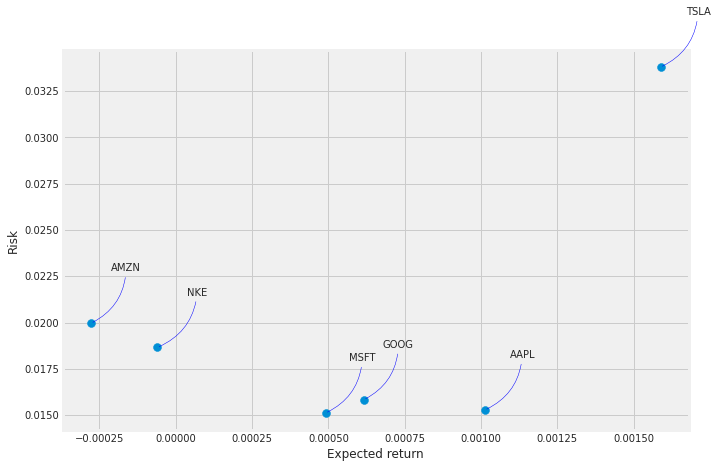

In [ ]:
#결측값 제거
rets = tech_rets.dropna()

area = np.pi * 20

#std() - 표준 편차 계산
#mean() - 평균 계산
plt.figure(figsize=(10,7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy = (x, y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575914
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783867
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917509
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.830002
2022-04-07,173.360001,169.850006,171.160004,172.139999,77594700.0,172.139999
2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996


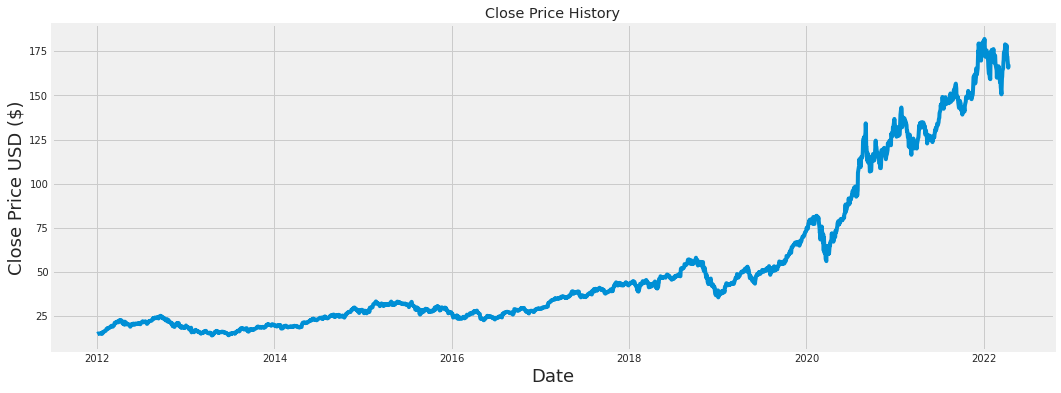

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])

dataset = data.values
training_data_len = int(np.ceil(len(dataset)*.95))
training_data_len

2458

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.92907401],
       [0.90325031],
       [0.91461515]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2398/2398 [==============================] - 78s 31ms/step - loss: 9.7773e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.595499150807477

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


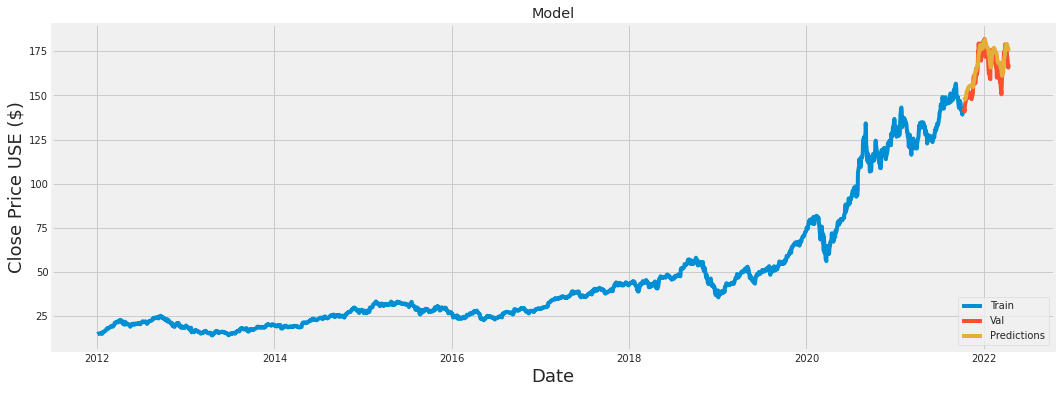

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USE ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-10-08,142.899994,147.468033
2021-10-11,142.809998,147.678940
2021-10-12,141.509995,147.900421
2021-10-13,140.910004,147.914078
2021-10-14,143.759995,147.749908
...,...,...
2022-04-06,171.830002,179.104126
2022-04-07,172.139999,178.463943
2022-04-08,170.089996,177.699478
